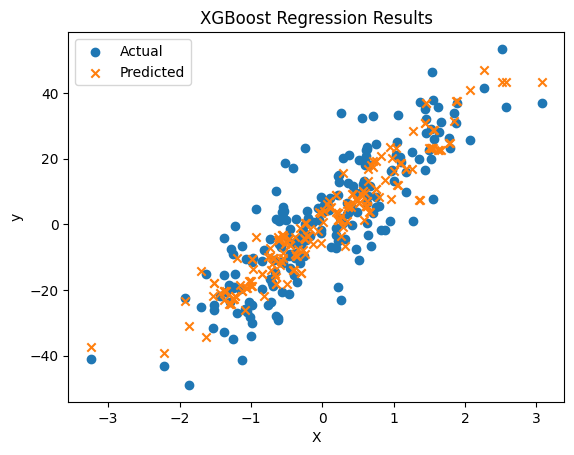

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

# Generate synthetic data for regression
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost regression model
model = XGBRegressor()
model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('XGBoost Regression Results')
plt.show()


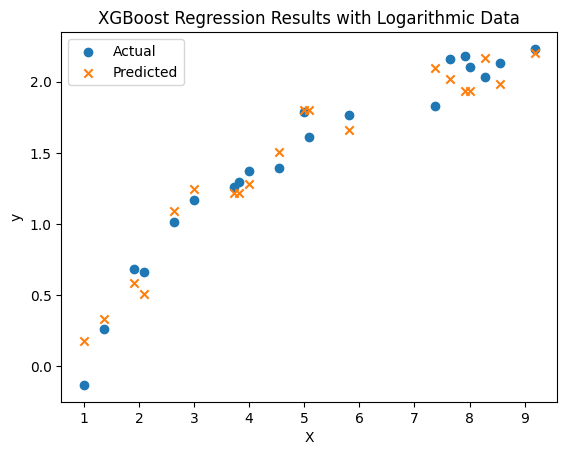

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Generate synthetic data with a logarithmic relationship
X = np.linspace(1, 10, 100).reshape(-1, 1)
y = np.log(X) + np.random.normal(0, 0.1, size=(100, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost regression model
model = XGBRegressor()
model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('XGBoost Regression Results with Logarithmic Data')
plt.show()


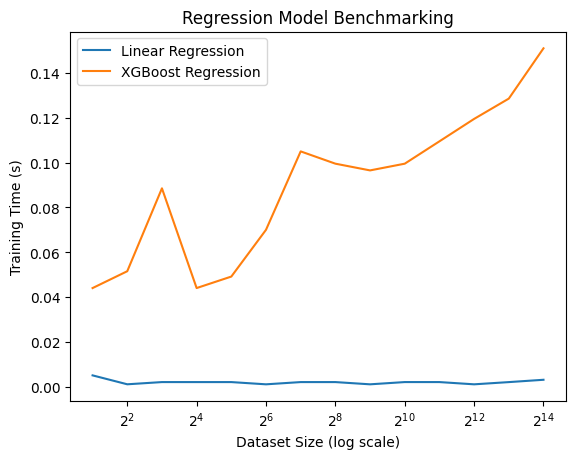

In [16]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Initialize an empty list to store results
linear_times = []
xgb_times = []
sizes = []

# Generate synthetic data with a logarithmic relationship
for i in range(15):
    n_samples = 2**i
    
    # Skip iteration if there's only one sample
    if n_samples <= 1:
        continue

    sizes.append(n_samples)
    
    X = np.linspace(1, 10, n_samples).reshape(-1, 1)
    y = np.log(X) + np.random.normal(0, 0.1, size=(n_samples, 1))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Benchmark Linear Regression
    start_time = time.time()
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_pred = linear_model.predict(X_test)
    linear_time = time.time() - start_time
    linear_times.append(linear_time)

    # Benchmark XGBoost Regression
    start_time = time.time()
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_time = time.time() - start_time
    xgb_times.append(xgb_time)

# Plot the benchmark results
plt.plot(sizes, linear_times, label='Linear Regression')
plt.plot(sizes, xgb_times, label='XGBoost Regression')
plt.xscale('log', base=2)  # Set x-axis to a logarithmic scale
plt.xlabel('Dataset Size (log scale)')
plt.ylabel('Training Time (s)')
plt.legend()
plt.title('Regression Model Benchmarking')
plt.show()


In [17]:
print(2**14)

16384


In [27]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_boston

# Load the Boston Housing dataset
boston = load_boston()
X, y = boston.data, boston.target


# Initialize empty lists to store results
linear_times = []
xgb_times = []
lgb_times = []
linear_errors = []
xgb_errors = []
lgb_errors = []
sizes = []

k = 15

# Generate synthetic data with a logarithmic relationship
for i in range(k):
    n_samples = int(X.shape[0] * i/k)
    
    # Skip iteration if there's only one sample
    if n_samples <= 1:
        continue

    # Sample nsamples from X and y
    indices = np.random.choice(X.shape[0], n_samples, replace=False)
    X_sampled = X[indices, :]
    y_sampled = y[indices]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)    
    sizes.append(n_samples)

    # Benchmark Linear Regression
    start_time = time.time()
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_pred = linear_model.predict(X_test)
    linear_time = time.time() - start_time
    linear_times.append(linear_time)
    linear_errors.append(mean_squared_error(y_test, linear_pred))

    # Benchmark XGBoost Regression
    start_time = time.time()
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_time = time.time() - start_time
    xgb_times.append(xgb_time)
    xgb_errors.append(mean_squared_error(y_test, xgb_pred))

    # Benchmark LightGBM Regression
    start_time = time.time()
    lgb_model = lgb.LGBMRegressor()
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)
    lgb_time = time.time() - start_time
    lgb_times.append(lgb_time)
    lgb_errors.append(mean_squared_error(y_test, lgb_pred))

# Plot the benchmark results
plt.figure(figsize=(10, 5))

# Plot Training Times
plt.subplot(1, 2, 1)
plt.plot(sizes, linear_times, label='Linear Regression')
plt.plot(sizes, xgb_times, label='XGBoost Regression')
plt.plot(sizes, lgb_times, label='LightGBM Regression')
plt.xscale('log', base=10)  # Set x-axis to a logarithmic scale
plt.xlabel('Dataset Size (log scale)')
plt.ylabel('Training Time (s)')
plt.legend()
plt.title('Training Time Benchmarking')

# Plot MSE Errors
plt.subplot(1, 2, 2)
plt.plot(sizes, linear_errors, label='Linear Regression')
plt.plot(sizes, xgb_errors, label='XGBoost Regression')
plt.plot(sizes, lgb_errors, label='LightGBM Regression')
plt.xscale('log', base=10)  # Set x-axis to a logarithmic scale
plt.xlabel('Dataset Size (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('Mean Squared Error Benchmarking')

plt.tight_layout()
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
